In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## 더미 데이터를 이용한 감정 분석 모델링

In [2]:
 samples = ['너 오늘 이뻐 보인다', '나는 오늘 기분이 더러워', '끝내주는데, 좋은 일이 있나봐', 
           '나 좋은 일이 생겼어', '아 오늘 진짜 짜증나', '환상적인데, 정말 좋은거 같아']
targets = [[1], [0], [1], [1], [0], [1]]  # 1 = positive

In [3]:
tokenizer = tf.keras.preprocessing.text.Tokenizer()
tokenizer.fit_on_texts(samples)
print(tokenizer.word_index)

{'오늘': 1, '좋은': 2, '일이': 3, '너': 4, '이뻐': 5, '보인다': 6, '나는': 7, '기분이': 8, '더러워': 9, '끝내주는데': 10, '있나봐': 11, '나': 12, '생겼어': 13, '아': 14, '진짜': 15, '짜증나': 16, '환상적인데': 17, '정말': 18, '좋은거': 19, '같아': 20}


In [55]:
sequences = tokenizer.texts_to_sequences(samples)
input_sequence = np.array(sequences)
targets = np.array(targets)
print(input_sequence)

[[ 4  1  5  6]
 [ 7  1  8  9]
 [10  2  3 11]
 [12  2  3 13]
 [14  1 15 16]
 [17 18 19 20]]


In [52]:
batch_size = 2
num_epochs = 100
vocab_size = len(tokenizer.word_index) + 1
emb_size = 128  # 자동으로 128 X 21 matrix 생성해줌 (그 안에는 랜덤 값이 들어가있음)
hidden_dimension = 256  
output_dimension = 1

In [53]:
model = tf.keras.Sequential(name = 'Sequential')
# token 하나 당 128개의 벡터로 만들어 의미있는 숫자로 생성 -> embedding
model.add(tf.keras.layers.Embedding(vocab_size, emb_size, input_length = 4))
# 들어온 x에 대해서 axis = 1을 기준으로 평균을 내어 128 x 1 배열을 생성
model.add(tf.keras.layers.Lambda(lambda x : tf.reduce_mean(x, axis = 1)))
model.add(tf.keras.layers.Dense(units = hidden_dimension, activation = 'relu', name = 'Dense1'))
model.add(tf.keras.layers.Dense(units = output_dimension, activation = 'sigmoid', name = 'outputs'))

model.summary()

Model: "Sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 4, 128)            2688      
_________________________________________________________________
lambda_5 (Lambda)            (None, 128)               0         
_________________________________________________________________
Dense1 (Dense)               (None, 256)               33024     
_________________________________________________________________
outputs (Dense)              (None, 1)                 257       
Total params: 35,969
Trainable params: 35,969
Non-trainable params: 0
_________________________________________________________________


In [54]:
model.compile(loss = 'binary_crossentropy', 
              optimizer = 'adam', metrics = ['acc'])
model.fit(input_sequence, targets, epochs = 100, batch_size = 2)

Epoch 1/100
3/3 [==============================] - 1s 5ms/step - loss: 0.6941 - acc: 0.3333
Epoch 2/100
3/3 [==============================] - 0s 5ms/step - loss: 0.6724 - acc: 1.0000
Epoch 3/100
3/3 [==============================] - 0s 11ms/step - loss: 0.6549 - acc: 1.0000
Epoch 4/100
3/3 [==============================] - 0s 4ms/step - loss: 0.6351 - acc: 1.0000
Epoch 5/100
3/3 [==============================] - 0s 8ms/step - loss: 0.6146 - acc: 1.0000
Epoch 6/100
3/3 [==============================] - 0s 9ms/step - loss: 0.5916 - acc: 1.0000
Epoch 7/100
3/3 [==============================] - 0s 3ms/step - loss: 0.5645 - acc: 1.0000
Epoch 8/100
3/3 [==============================] - 0s 10ms/step - loss: 0.5338 - acc: 1.0000
Epoch 9/100
3/3 [==============================] - 0s 11ms/step - loss: 0.4995 - acc: 1.0000
Epoch 10/100
3/3 [==============================] - 0s 7ms/step - loss: 0.4595 - acc: 1.0000
Epoch 11/100
3/3 [==============================] - 0s 8ms/step - loss: 0.41

In [9]:
# Functional API
inputs = tf.keras.Input(shape = (4, ))
embedding = tf.keras.layers.Embedding(vocab_size, emb_size, name = 'embedding')(inputs)
lamda = tf.reduce_mean(embedding, axis = 1, name = 'lamda')
hidden = tf.keras.layers.Dense(units = hidden_dimension, activation = 'relu', name = 'dense')(lamda)
outputs = tf.keras.layers.Dense(units = 1, activation = 'sigmoid', name = 'outputs')(hidden)

model = tf.keras.Model(inputs = inputs, outputs = outputs, name = 'Funtional_API')

model.summary()

Model: "Funtional_API"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 4)]               0         
_________________________________________________________________
embedding (Embedding)        (None, 4, 128)            2688      
_________________________________________________________________
tf.math.reduce_mean_1 (TFOpL (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               33024     
_________________________________________________________________
outputs (Dense)              (None, 1)                 257       
Total params: 35,969
Trainable params: 35,969
Non-trainable params: 0
_________________________________________________________________


In [13]:
class CustomModel(tf.keras.Model) :
    def __init__(self, vocab_size, emb_size, hidden_dimension, output_dimension) :
        super(CustomModel, self).__init__(name = 'Subclassing')
        self.embedding = tf.keras.layers.Embedding(vocab_size, emb_size, name = 'embedding')
        self.dense = tf.keras.layers.Dense(units = hidden_dimension, activation = 'relu', name = 'dense')
        self.outputs = tf.keras.layers.Dense(units = output_dimension, activation = 'sigmoid', name = 'outputs')
        
    def call(self, inputs) :
        x = self.embedding(inputs)
        x = tf.reduce_mean(x, axis = 1)
        x = tf.dense(x)
        x = self.outputs(x)
        
        return x

In [14]:
mymodel = CustomModel(vocab_size, emb_size, hidden_dimension, output_dimension)

In [17]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['acc'])
model.fit(input_sequence, targets, epochs = 100, batch_size = 2)

Epoch 1/100
3/3 [==============================] - 1s 4ms/step - loss: 0.6922 - acc: 0.5000
Epoch 2/100
3/3 [==============================] - 0s 7ms/step - loss: 0.6761 - acc: 1.0000
Epoch 3/100
3/3 [==============================] - 0s 7ms/step - loss: 0.6617 - acc: 1.0000
Epoch 4/100
3/3 [==============================] - 0s 4ms/step - loss: 0.6478 - acc: 1.0000
Epoch 5/100
3/3 [==============================] - 0s 6ms/step - loss: 0.6308 - acc: 1.0000
Epoch 6/100
3/3 [==============================] - 0s 6ms/step - loss: 0.6114 - acc: 1.0000
Epoch 7/100
3/3 [==============================] - 0s 11ms/step - loss: 0.5895 - acc: 1.0000
Epoch 8/100
3/3 [==============================] - 0s 9ms/step - loss: 0.5632 - acc: 1.0000
Epoch 9/100
3/3 [==============================] - 0s 7ms/step - loss: 0.5314 - acc: 1.0000
Epoch 10/100
3/3 [==============================] - 0s 10ms/step - loss: 0.4942 - acc: 1.0000
Epoch 11/100
3/3 [==============================] - 0s 8ms/step - loss: 0.453

## Machine learning

In [31]:
import sklearn

In [33]:
from sklearn.datasets import load_iris
iris_dataset = load_iris()
iris_dataset.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [34]:
print(iris_dataset['target'])
print(iris_dataset['target_names'])
print(iris_dataset['DESCR'])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
['setosa' 'versicolor' 'virginica']
.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ==

In [37]:
iris = pd.DataFrame(iris_dataset['data'])
iris.columns = iris_dataset['feature_names']
iris['target'] = iris_dataset['target']
type(iris)

pandas.core.frame.DataFrame

In [38]:
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [40]:
setosa = iris[iris['target'] == 0]
versicolor = iris[iris['target'] == 1]
virgina = iris[iris['target'] == 2]

virgina.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
100,6.3,3.3,6.0,2.5,2
101,5.8,2.7,5.1,1.9,2
102,7.1,3.0,5.9,2.1,2
103,6.3,2.9,5.6,1.8,2
104,6.5,3.0,5.8,2.2,2


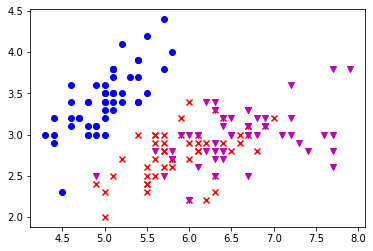

In [42]:
plt.scatter(setosa['sepal length (cm)'], setosa['sepal width (cm)'], marker = 'o', color = 'b', label = 'setosa')
plt.scatter(versicolor['sepal length (cm)'], versicolor['sepal width (cm)'], marker = 'x', color = 'r', label = 'versicolor')
plt.scatter(virgina['sepal length (cm)'], virgina['sepal width (cm)'], marker = 'v', color = 'm', label = 'virgina')
plt.show()

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [57]:
train_input, test_input, train_label, test_label = train_test_split(iris_dataset['data'], iris_dataset['target'], 
                                                                    test_size = 0.25, random_state = 42)

In [60]:
print(iris_dataset['data'].shape)
print(train_input.shape)
print(test_input.shape)

(150, 4)
(112, 4)
(38, 4)


In [61]:
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [62]:
train_scaled

array([[-1.01827123,  1.2864604 , -1.39338902, -1.3621769 ],
       [-0.7730102 ,  2.43545215, -1.33550342, -1.49647603],
       [-0.03722712, -0.78172474,  0.74837808,  0.92090833],
       [ 0.20803391,  0.8268637 ,  0.4010645 ,  0.51801093],
       [ 1.06644751,  0.13746866,  0.51683569,  0.3837118 ],
       [-0.52774918,  1.97585545, -1.45127462, -1.09357864],
       [-0.52774918,  1.51625875, -1.33550342, -1.3621769 ],
       [-0.40511866, -1.47111979, -0.06202028, -0.28778385],
       [ 0.57592545, -0.55192639,  0.74837808,  0.3837118 ],
       [ 0.69855596,  0.13746866,  0.97992047,  0.7866092 ],
       [ 0.94381699, -0.09232969,  0.3431789 ,  0.24941267],
       [ 1.67960008,  1.2864604 ,  1.32723405,  1.72670311],
       [-0.15985763, -0.32212804,  0.2274077 ,  0.11511354],
       [ 2.17012213, -0.09232969,  1.61666204,  1.18950659],
       [-0.28248815, -0.09232969,  0.4010645 ,  0.3837118 ],
       [-0.89564072,  1.05666205, -1.39338902, -1.3621769 ],
       [ 2.29275265, -0.

In [63]:
from sklearn.neighbors import KNeighborsClassifier

In [65]:
knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(train_scaled, train_label)

KNeighborsClassifier(n_neighbors=10)

In [66]:
new_input = np.array([[6.1, 2.8, 4.7, 2.2]])
new_scaled = ss.transform(new_input)
new_scaled

array([[ 0.33066442, -0.55192639,  0.51683569,  1.32380572]])

In [71]:
predict_label = knn.predict(new_scaled)
predict_label
knn.predict_proba(new_scaled)
knn.predict_proba(test_scaled[:5])

array([[0. , 0.9, 0.1],
       [1. , 0. , 0. ],
       [0. , 0. , 1. ],
       [0. , 0.7, 0.3],
       [0. , 0.8, 0.2]])

In [73]:
predict_test = knn.predict(test_scaled)
print(predict_test)

print(np.mean(predict_test == test_label))

[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]
1.0


In [74]:
from sklearn.cluster import KMeans

In [75]:
k_means = KMeans(n_clusters = 3)

In [76]:
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [77]:
k_means.fit(train_scaled)

KMeans(n_clusters=3)

In [78]:
k_means.labels_

array([0, 0, 1, 2, 2, 0, 0, 1, 1, 2, 2, 2, 1, 2, 1, 0, 2, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 2, 0, 1, 1, 0, 1, 1, 1, 1, 2, 1, 0, 1, 1, 0,
       0, 1, 2, 0, 1, 0, 0, 2, 1, 2, 1, 1, 2, 1, 0, 0, 1, 2, 0, 0, 0, 1,
       2, 0, 2, 2, 0, 1, 1, 1, 2, 2, 0, 2, 1, 2, 1, 1, 1, 0, 1, 1, 0, 1,
       2, 2, 0, 1, 2, 2, 0, 2, 0, 2, 2, 2, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 2])

In [79]:
predict_cluster = k_means.predict(test_scaled)
predict_cluster

array([1, 0, 2, 1, 2, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 2, 2, 1, 1, 2, 0, 1,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 0, 0, 1, 2, 0])

In [81]:
np.mean(predict_cluster == test_label)

0.8421052631578947

# [ 사이킷런을 통한 단어 특징 추출 ]

## CountVectorizer
문장에서 중요한 단어는 무엇일까 ?

단어의 빈도수가 높은것이 제일 중요한 단어가 아닐까?

## One - hot - encoding 문제점
1. 차원이 너무 많아진다
2. Sparsity => 하나만 1이고 나머지는 전부 0
3. [man, woman, king, queen] 예제에서 유사관계가 man - king : 0, man - queen : 0 으로 나오는 문제점 발생

## Word representation : Count - based - method

윈도우 크기 (N = 1) 에 따라서 단어를 기준으로 N 만큼 떨어진 단어의 갯수를 샌다.

* I like deep learning
* I like NLP
* I enjoy flying

카운트 | i | like | enjoy | deep | learning | NLP | flying
I

like

enjoy

deep

learning

NLP

flying

* 단어-문서 행렬 (Term-Document martix, TDM)
* 문서-단어 행렬 (Document-Term, DTM)

## CountVectorizer의 문제점
개수로만 특징을 추출하게 되면 그래서, 그러나 등과 같이 문장을 꾸며주는 단어들이 추출될 가능성이 높다.

In [83]:
from sklearn.feature_extraction.text import CountVectorizer

In [84]:
text_data = ['나는 배가 고프다', '내일 점심 뭐먹지', '내일 공부 해야겠다', '점심 먹고 공부 해야지']

In [86]:
count_vectorizer = CountVectorizer()

In [88]:
count_vectorizer.fit(text_data)

CountVectorizer()

In [89]:
count_vectorizer.vocabulary_

{'나는': 2,
 '배가': 6,
 '고프다': 0,
 '내일': 3,
 '점심': 7,
 '뭐먹지': 5,
 '공부': 1,
 '해야겠다': 8,
 '먹고': 4,
 '해야지': 9}

In [93]:
print(count_vectorizer.transform([text_data[0]]).toarray())
print(count_vectorizer.transform([text_data[1]]).toarray())

[[1 0 1 0 0 0 1 0 0 0]]
[[0 0 0 1 0 1 0 1 0 0]]


## TfidVectorizer


In [94]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [95]:
tfidf_vectorizer = TfidfVectorizer()

In [96]:
text_data = ['나는 배가 고프다', '내일 점심 뭐먹지', '내일 공부 해야겠다', '점심 먹고 공부 해야지']

In [97]:
tfidf_vectorizer.fit(text_data)

TfidfVectorizer()

In [98]:
tfidf_vectorizer.vocabulary_

{'나는': 2,
 '배가': 6,
 '고프다': 0,
 '내일': 3,
 '점심': 7,
 '뭐먹지': 5,
 '공부': 1,
 '해야겠다': 8,
 '먹고': 4,
 '해야지': 9}

In [99]:
tfidf_vectorizer.transform([text_data[0]]).toarray()

array([[0.57735027, 0.        , 0.57735027, 0.        , 0.        ,
        0.        , 0.57735027, 0.        , 0.        , 0.        ]])

## Tokenization

In [100]:
import nltk

In [102]:
nltk.download('all-corpora')

[nltk_data] Downloading collection 'all-corpora'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\enduser\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\abc.zip.
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\enduser\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\alpino.zip.
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     C:\Users\enduser\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\biocreative_ppi.zip.
[nltk_data]    | Downloading package brown to
[nltk_data]    |     C:\Users\enduser\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\brown.zip.
[nltk_data]    | Downloading package brown_tei to
[nltk_data]    |     C:\Users\enduser\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\brown_tei.zip.
[nltk_data]    | Downloading package cess_cat to
[nltk_data]    |     C:\Users\enduser\AppData\Roaming

[nltk_data]    |   Unzipping corpora\problem_reports.zip.
[nltk_data]    | Downloading package product_reviews_1 to
[nltk_data]    |     C:\Users\enduser\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\product_reviews_1.zip.
[nltk_data]    | Downloading package product_reviews_2 to
[nltk_data]    |     C:\Users\enduser\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\product_reviews_2.zip.
[nltk_data]    | Downloading package propbank to
[nltk_data]    |     C:\Users\enduser\AppData\Roaming\nltk_data...
[nltk_data]    | Downloading package pros_cons to
[nltk_data]    |     C:\Users\enduser\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\pros_cons.zip.
[nltk_data]    | Downloading package ptb to
[nltk_data]    |     C:\Users\enduser\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\ptb.zip.
[nltk_data]    | Downloading package qc to
[nltk_data]    |     C:\Users\enduser\AppData\Roaming\nltk_data...
[nltk_data]    |   U

True

In [105]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\enduser\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [107]:
from nltk.tokenize import sent_tokenize # sentence로 토큰화
from nltk.tokenize import word_tokenize # word로 토큰화

In [110]:
paragraph = "Natural language processing (NLP) is a subfield of computer science, information engineering, and artificial intelligence concerned with the interactions between computers and human (natural) languages, in particular how to program computers to process and analyze large amounts of natural language data. Challenges in natural language processing frequently involve speech recognition, natural language understanding, and natural language generation."

print(sent_tokenize(paragraph)) 
print(word_tokenize(paragraph))

['Natural language processing (NLP) is a subfield of computer science, information engineering, and artificial intelligence concerned with the interactions between computers and human (natural) languages, in particular how to program computers to process and analyze large amounts of natural language data.', 'Challenges in natural language processing frequently involve speech recognition, natural language understanding, and natural language generation.']
['Natural', 'language', 'processing', '(', 'NLP', ')', 'is', 'a', 'subfield', 'of', 'computer', 'science', ',', 'information', 'engineering', ',', 'and', 'artificial', 'intelligence', 'concerned', 'with', 'the', 'interactions', 'between', 'computers', 'and', 'human', '(', 'natural', ')', 'languages', ',', 'in', 'particular', 'how', 'to', 'program', 'computers', 'to', 'process', 'and', 'analyze', 'large', 'amounts', 'of', 'natural', 'language', 'data', '.', 'Challenges', 'in', 'natural', 'language', 'processing', 'frequently', 'involve',

In [2]:
!java -version

java version "19.0.1" 2022-10-18
Java(TM) SE Runtime Environment (build 19.0.1+10-21)
Java HotSpot(TM) 64-Bit Server VM (build 19.0.1+10-21, mixed mode, sharing)


In [3]:
import sys
sys.version

'3.6.13 |Anaconda, Inc.| (default, Mar 16 2021, 11:37:27) [MSC v.1916 64 bit (AMD64)]'

In [4]:
! pip install JPype1-1.1.2-cp36-cp36m-win_amd64.whl

Defaulting to user installation because normal site-packages is not writeable
Processing c:\users\enduser\python_nlp\jpype1-1.1.2-cp36-cp36m-win_amd64.whl


In [5]:
! pip install konlpy

Defaulting to user installation because normal site-packages is not writeable


In [6]:
import konlpy
from konlpy.tag import Okt

In [7]:
okt = Okt()

In [8]:
text = "한글 자연어 처리는 재밌다 이제부터 열심히 해야지ㅎㅎㅎ"

In [12]:
print(okt.morphs(text))
print(okt.nouns(text)) # 명사만으로 토큰화
print(okt.phrases(text))
print(okt.pos(text))

['한글', '자연어', '처리', '는', '재밌다', '이제', '부터', '열심히', '해야지', 'ㅎㅎㅎ']
['한글', '자연어', '처리', '이제']
['한글', '한글 자연어', '한글 자연어 처리', '이제', '자연어', '처리']
[('한글', 'Noun'), ('자연어', 'Noun'), ('처리', 'Noun'), ('는', 'Josa'), ('재밌다', 'Adjective'), ('이제', 'Noun'), ('부터', 'Josa'), ('열심히', 'Adverb'), ('해야지', 'Verb'), ('ㅎㅎㅎ', 'KoreanParticle')]


In [13]:
from konlpy.corpus import kolaw
from konlpy.corpus import kobill

In [14]:
kolaw.open('constitution.txt').read()

'대한민국헌법\n\n유구한 역사와 전통에 빛나는 우리 대한국민은 3·1운동으로 건립된 대한민국임시정부의 법통과 불의에 항거한 4·19민주이념을 계승하고, 조국의 민주개혁과 평화적 통일의 사명에 입각하여 정의·인도와 동포애로써 민족의 단결을 공고히 하고, 모든 사회적 폐습과 불의를 타파하며, 자율과 조화를 바탕으로 자유민주적 기본질서를 더욱 확고히 하여 정치·경제·사회·문화의 모든 영역에 있어서 각인의 기회를 균등히 하고, 능력을 최고도로 발휘하게 하며, 자유와 권리에 따르는 책임과 의무를 완수하게 하여, 안으로는 국민생활의 균등한 향상을 기하고 밖으로는 항구적인 세계평화와 인류공영에 이바지함으로써 우리들과 우리들의 자손의 안전과 자유와 행복을 영원히 확보할 것을 다짐하면서 1948년 7월 12일에 제정되고 8차에 걸쳐 개정된 헌법을 이제 국회의 의결을 거쳐 국민투표에 의하여 개정한다.\n\n       제1장 총강\n  제1조 ① 대한민국은 민주공화국이다.\n②대한민국의 주권은 국민에게 있고, 모든 권력은 국민으로부터 나온다.\n  제2조 ① 대한민국의 국민이 되는 요건은 법률로 정한다.\n②국가는 법률이 정하는 바에 의하여 재외국민을 보호할 의무를 진다.\n  제3조 대한민국의 영토는 한반도와 그 부속도서로 한다.\n  제4조 대한민국은 통일을 지향하며, 자유민주적 기본질서에 입각한 평화적 통일 정책을 수립하고 이를 추진한다.\n  제5조 ① 대한민국은 국제평화의 유지에 노력하고 침략적 전쟁을 부인한다.\n②국군은 국가의 안전보장과 국토방위의 신성한 의무를 수행함을 사명으로 하며, 그 정치적 중립성은 준수된다.\n  제6조 ① 헌법에 의하여 체결·공포된 조약과 일반적으로 승인된 국제법규는 국내법과 같은 효력을 가진다.\n②외국인은 국제법과 조약이 정하는 바에 의하여 그 지위가 보장된다.\n  제7조 ① 공무원은 국민전체에 대한 봉사자이며, 국민에 대하여 책임을 진다.\n②공무원의 신분과 정치적 중립성은 법률이 정하는 바에 의하여 보장된다.\n  제8조 ① 정

In [15]:
kobill.open('1809890.txt').read()

'지방공무원법 일부개정법률안\n\n(정의화의원 대표발의 )\n\n 의 안\n 번 호\n\n9890\n\n발의연월일 : 2010.  11.  12.  \n\n발  의  자 : 정의화․이명수․김을동 \n\n이사철․여상규․안규백\n\n황영철․박영아․김정훈\n\n김학송 의원(10인)\n\n제안이유 및 주요내용\n\n  초등학교 저학년의 경우에도 부모의 따뜻한 사랑과 보살핌이 필요\n\n한 나이이나, 현재 공무원이 자녀를 양육하기 위하여 육아휴직을 할 \n\n수 있는 자녀의 나이는 만 6세 이하로 되어 있어 초등학교 저학년인 \n\n자녀를 돌보기 위해서는 해당 부모님은 일자리를 그만 두어야 하고 \n\n이는 곧 출산의욕을 저하시키는 문제로 이어질 수 있을 것임.\n\n  따라서 육아휴직이 가능한 자녀의 연령을 만 8세 이하로 개정하려\n\n는 것임(안 제63조제2항제4호).\n\n- 1 -\n\n\x0c법률  제        호\n\n지방공무원법 일부개정법률안\n\n지방공무원법 일부를 다음과 같이 개정한다.\n\n제63조제2항제4호 중 “만 6세 이하의 초등학교 취학 전 자녀를”을 “만 \n\n8세 이하(취학 중인 경우에는 초등학교 2학년 이하를 말한다)의 자녀를”\n\n로 한다.\n\n부      칙\n\n이 법은 공포한 날부터 시행한다.\n\n- 3 -\n\n\x0c신 ·구조문대비표\n\n현      행\n\n개   정   안\n\n제63조(휴직) ① (생  략)\n\n제63조(휴직) ① (현행과 같음)\n\n  ② 공무원이 다음 각 호의 어\n\n  ② -------------------------\n\n느 하나에 해당하는 사유로 휴\n\n----------------------------\n\n직을 원하면 임용권자는 휴직\n\n----------------------------\n\n을 명할 수 있다. 다만, 제4호\n\n-------------.---------------\n\n의 경우에는 대통령령으로 정\n\n---------------------------